In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

pd.options.display.float_format = '{:,.0f}'.format

In [3]:
df = pd.read_csv('./data/TB_train_시나리오2.csv')
pred = pd.read_csv('./data/TB_pred_시나리오2.csv')

In [4]:
df.head()

,Date,실공급량,실수요량,누적 실공급량,누적 실수요량,(공급량 - 수요량),누적 (공급량 - 수요량),rec_price
0,201703,"1,257,287","997,553","80,945","46,735,739","259,734","-13,002,555","132,704"
1,201704,"1,260,656","1,000,226","34,993,840","47,735,965","260,430","-12,742,124","125,297"
2,201705,"1,695,975","1,345,615","80,945","49,081,580","350,360","-12,391,765","131,236"
3,201706,"1,459,628","1,158,094","38,149,444","50,239,674","301,535","-12,090,230","130,276"
4,201707,"1,255,754","996,336","80,945","51,236,010","259,418","-11,830,813","127,793"


In [5]:
features = ['실공급량', '실수요량', '누적 실공급량', '누적 실수요량', '(공급량 - 수요량)', '누적 (공급량 - 수요량)']

train = df[df['Date'] < 202101]
valid = df[(df['Date'].isin([202101,202102]))]

X_train = train[features]
y_train = train['rec_price']

X_valid = valid[features]
y_valid = valid['rec_price']

X_pred = pred[features]

# Polynomial => Fail

# linear

In [6]:
model = LinearRegression() 
model.fit(X_train, y_train)
print("Model Score of train", model, ': ', model.score(X_train, y_train))  
print("Model Score of valid", model, ': ', model.score(X_valid, y_valid))  

Model Score of train LinearRegression() :  0.9674940404325074
Model Score of valid LinearRegression() :  -69.59828736283677


In [7]:
predicted = model.predict(X_pred)
results = pred[['Date']]
results['rec_price'] = predicted

temp = df[['Date', 'rec_price']]

total = pd.concat([temp, results], axis = 0)
total['Date'] = pd.to_datetime(total['Date'], format='%Y%m')
total.head()

<ipython-input-7-4e65ee316031>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['rec_price'] = predicted


,Date,rec_price
0,2017-03-01,"132,704"
1,2017-04-01,"125,297"
2,2017-05-01,"131,236"
3,2017-06-01,"130,276"
4,2017-07-01,"127,793"


C:\Users\jeongMin.PARK\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jeongMin.PARK\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


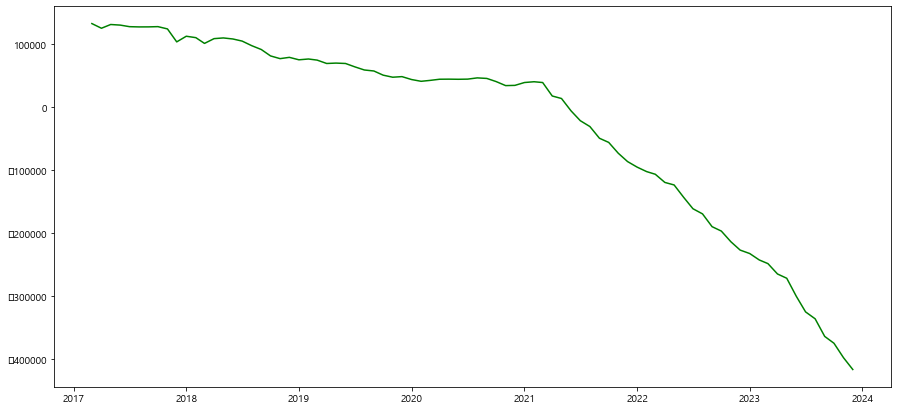

In [8]:
plt.figure(figsize=(15,7))
ax = plt.subplot(111)
ax.plot(total['Date'], total['rec_price'], color='g')

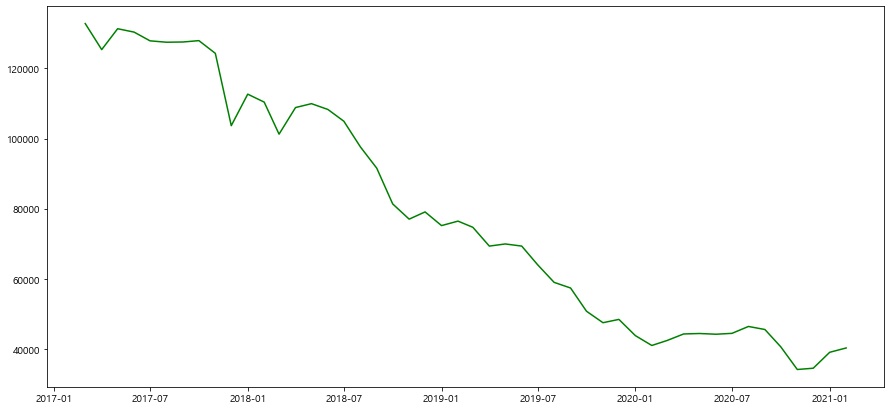

In [9]:
plt.figure(figsize=(15,7))
ax = plt.subplot(111)
ax.plot(total[total['Date'] <= '2021-02-01']['Date'], total[total['Date'] <= '2021-02-01']['rec_price'], color='g')

# Random Forest

In [99]:
features = ['실공급량', '실수요량', '누적 실공급량', '누적 실수요량', '(공급량 - 수요량)', '누적 (공급량 - 수요량)']

train = df[df['Date'] < 202103]
# valid = df[(df['Date'].isin([202101,202102]))]

X_train = train[features]
y_train = train['rec_price']

X_valid = valid[features]
y_valid = valid['rec_price']

X_pred = pred[features]

In [100]:
model = RandomForestRegressor() 
model.fit(X_train, y_train)
print("Model Score of train", model, ': ', model.score(X_train, y_train))  
# print("Model Score of valid", model, ': ', model.score(X_valid, y_valid))  

Model Score of train RandomForestRegressor() :  0.9977809885646337


In [101]:
model.feature_importances_

array([0.00137743, 0.00177897, 0.0012575 , 0.49787908, 0.0018544 ,
       0.49585263])

In [96]:
predicted = model.predict(X_pred)
results = pred[['Date']]
results['rec_price'] = predicted

temp = df[['Date', 'rec_price']]

total = pd.concat([temp, results], axis = 0)
total['Date'] = pd.to_datetime(total['Date'], format='%Y%m')
total.head()

<ipython-input-96-4e65ee316031>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['rec_price'] = predicted


,Date,rec_price
0,2017-03-01,"132,704"
1,2017-04-01,"125,297"
2,2017-05-01,"131,236"
3,2017-06-01,"130,276"
4,2017-07-01,"127,793"


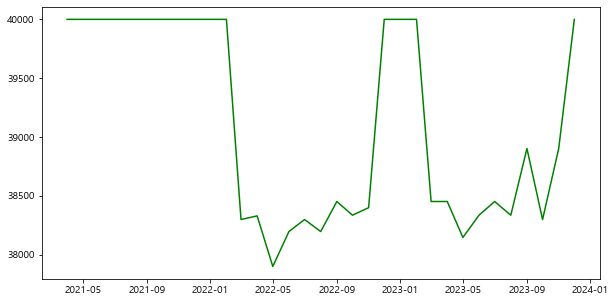

In [97]:
plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.plot(total[total['Date'] >= '2021-04-01']['Date'], total[total['Date'] >= '2021-04-01']['rec_price'], color='g')
# plt.ylim([:,50000])

In [84]:
total[total['Date'] == '2021-03-01']

,Date,rec_price
48,2021-03-01,"39,138"


In [85]:
total[total['Date'] >= '2021-05-01']['rec_price'].mean()

38564.87515625

In [79]:
df.shape

(49, 8)

# MLP

In [102]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(hidden_layer_sizes=[512, 4], max_iter=500, alpha=0.005, random_state=42).fit(X_train, y_train)
print("Model Score of train", model, ': ', model.score(X_train, y_train))  

predicted = regr.predict(X_pred)
results = pred[['Date']]
results['rec_price'] = predicted

temp = df[['Date', 'rec_price']]

total = pd.concat([temp, results], axis = 0)
total['Date'] = pd.to_datetime(total['Date'], format='%Y%m')
total.head()

Model Score of train RandomForestRegressor() :  0.9977809885646337


C:\Users\jeongMin.PARK\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-102-551050176cda>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['rec_price'] = predicted


,Date,rec_price
0,2017-03-01,"132,704"
1,2017-04-01,"125,297"
2,2017-05-01,"131,236"
3,2017-06-01,"130,276"
4,2017-07-01,"127,793"


20701.451154294344


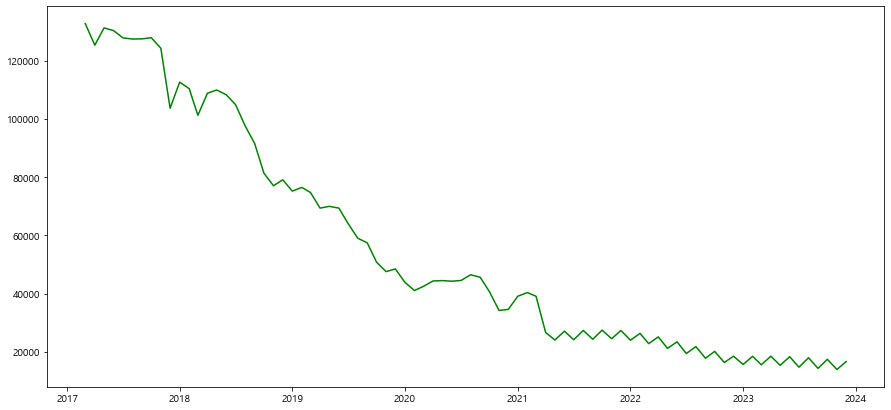

In [103]:
plt.figure(figsize=(15,7))
ax = plt.subplot(111)
ax.plot(total['Date'], total['rec_price'], color='g')
print(total[total['Date'] >= '2021-05-01']['rec_price'].mean())

In [104]:
total[total['Date'] >= '2021-05-01']

,Date,rec_price
1,2021-05-01,"24,141"
2,2021-06-01,"27,166"
3,2021-07-01,"24,217"
4,2021-08-01,"27,409"
5,2021-09-01,"24,391"
6,2021-10-01,"27,519"
7,2021-11-01,"24,569"
8,2021-12-01,"27,397"
9,2022-01-01,"24,078"
10,2022-02-01,"26,407"
